# Topological insulators

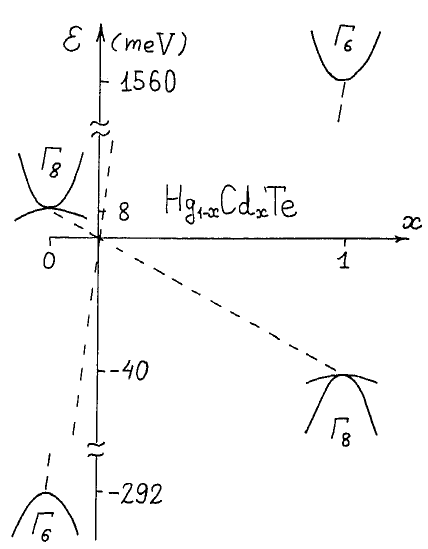

*Figure from Volkov-Pankratov/1985*

Interface between materials with inverted bands. $\Gamma_6$ are S-like bands and $\Gamma_8$ are P-like bands. After the inversion, they hybridize into non-trivial bands. **Let's try to understand what that means!**

## The BHZ model

HgTe and CdTe have inverted bands. So, if we make quantum wells from their sandwich...

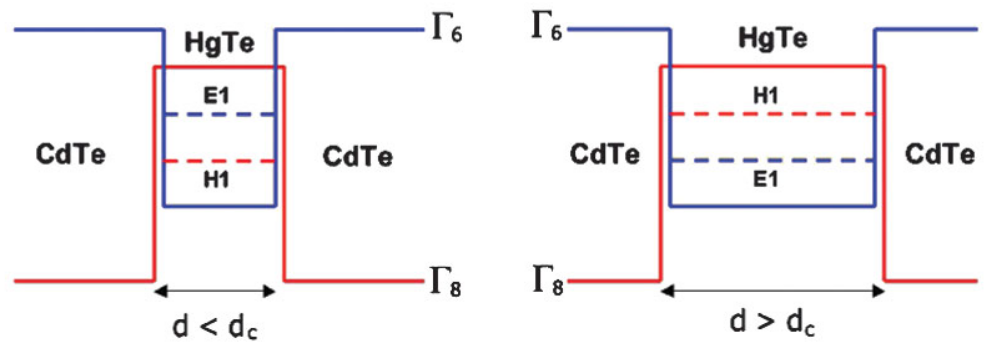

As the well width increases, the **electron-like** and **hole-like** bands cross each other. This crossing is the topological phase transition. **But why?**

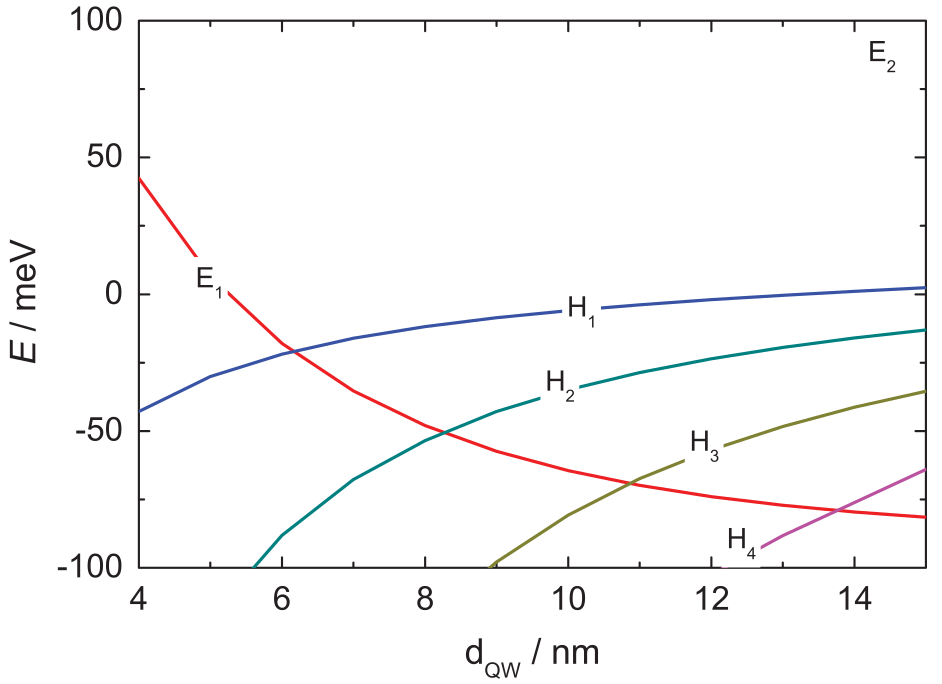

### Effective model

**How to obtain effective models?** That would be another mini-course...

For now, believe me that electrons confined to that quantum well obey this Hamiltonian

$$H = A(\sigma_x k_x - \sigma_y k_y) + (\color{red}{M}-B k^2)\sigma_z$$

Where the Dirac mass $\color{red}{M = E_1 - H_1}$. So the **mass changes sign at the crossing**

For the inverted bands, the term $A$ above couples the bands, which become non-trivial, leading to edge states.

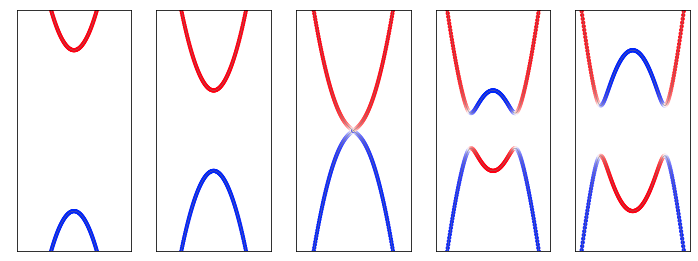

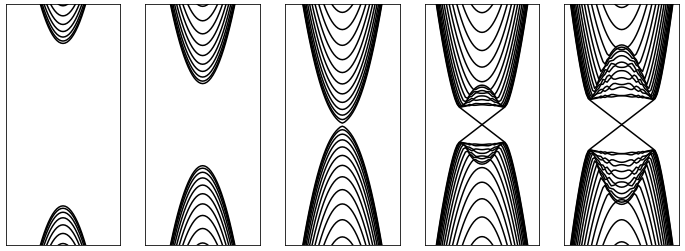

# Implementation

Let's try to reproduce the figures above.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

## Define the Hamiltonian

$$H = A(\sigma_x k_x - \sigma_y k_y) + (\color{red}{M}-B k^2)\sigma_z$$

Let's fix $B = 0.1$ and vary $A$ from 0 to 1, and $M$ between -1 and 1.

In [ ]:
s0 = np.eye(2)
sx = np.array([[0,1],[1,0]])
sy = np.array([[0,-1j],[1j,0]])
sz = np.array([[1,0],[0,-1]])

def BHZ(kx, ky, m=1, a=1, b=-0.1):
    k2 = kx**2 + ky**2
    h = a*(sx*kx + sy*ky) + (m - b*k2)*sz
    return h

## Solve it for different M and A

In [ ]:
nk = 201
ks = np.linspace(-5, 5, nk)

a = 0.1

ms = np.array([1, 0.5, 0, -0.5, -1])
bands = {}
for m in ms:
    bands[m] = np.array([np.linalg.eigvalsh(BHZ(kx, 0, m, a)) for kx in ks])

In [ ]:
plt.figure(figsize=(10,4))
spt = 150
for m in ms:
    spt += 1
    plt.subplot(spt)
    plt.plot(ks, bands[m], c='black')
    plt.xticks([])
    plt.yticks([])
    plt.ylim(-1.5, 1.5)
    
plt.tight_layout()
plt.show()

## Label states by $\langle \sigma_z \rangle$

In [ ]:
def get_sz(kx, ky, m=1, a=1, b=-0.1):
    h = BHZ(kx, ky, m, a, b)
    
    en, psi = np.linalg.eigh(h)
    
    szm = np.array([np.conj(psi[:,n]).T @ sz @ psi[:,n] for n in range(2)])
    
    return szm.real

In [ ]:
szs = {}
for m in ms:
    bands[m] = np.array([np.linalg.eigvalsh(BHZ(kx, 0, m, a)) for kx in ks])
    szs[m] = np.array([get_sz(kx, 0, m, a) for kx in ks])

In [ ]:
plt.figure(figsize=(10,4))
spt = 150
for m in ms:
    spt += 1
    plt.subplot(spt)
    plt.plot(ks, bands[m], c='gray', lw=0.5)
    for j in range(2):
        plt.scatter(ks, bands[m][:,j], c=szs[m][:,j], s=10,
                    vmin=-1, vmax=1, cmap='bwr')
    plt.xticks([])
    plt.yticks([])
    plt.ylim(-1.5, 1.5)
    
plt.tight_layout()
plt.show()